<a href="https://colab.research.google.com/github/24JE0305/Ford_Price_Predictor/blob/main/Ford_Price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data Set

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
# for model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
df = pd.read_csv('ford.csv')

## EDA

In [91]:

df.shape

(17966, 9)

In [92]:
df.isnull().sum().sum()

np.int64(0)

In [93]:
df.duplicated().sum()

np.int64(154)

In [94]:
df[df.duplicated()].head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
159,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
312,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
349,Focus,2019,14998,Manual,7000,Petrol,145,58.9,1.0
510,EcoSport,2019,15489,Manual,5636,Diesel,145,68.9,1.5
512,Grand Tourneo Connect,2019,19999,Manual,3500,Diesel,145,61.4,1.5
556,Grand Tourneo Connect,2018,15990,Automatic,9486,Diesel,145,56.6,1.5
557,Fiesta,2018,10990,Manual,28138,Petrol,145,56.5,1.0
559,EcoSport,2017,9489,Manual,29500,Petrol,145,52.3,1.0
1575,Focus,2018,17989,Manual,19653,Petrol,145,41.5,2.0
2129,Kuga,2019,16995,Manual,13255,Diesel,145,47.9,2.0


as our data set has around 18,000 rows and duplicated row as completly identical we can safely remove them.

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  object 
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  object 
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [97]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


<Axes: xlabel='price', ylabel='Count'>

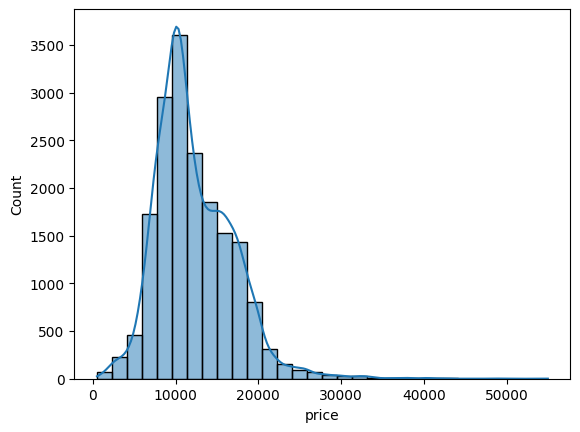

In [98]:
sns.histplot(df['price'],kde = True,bins=30)

Price is right skewed so we have to use log transformation

In [99]:
df['price_log'] = np.log1p(df['price'])

<Axes: xlabel='price_log', ylabel='Count'>

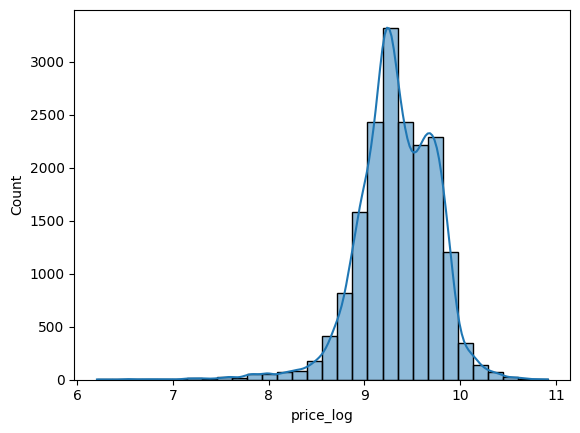

In [100]:
sns.histplot(df['price_log'],kde=True,bins=30)

although there is not quite difference we will check difference latter

**Note this:-** *This is not part of EDA but we need before finding corr*

In [101]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price_log'],
      dtype='object')

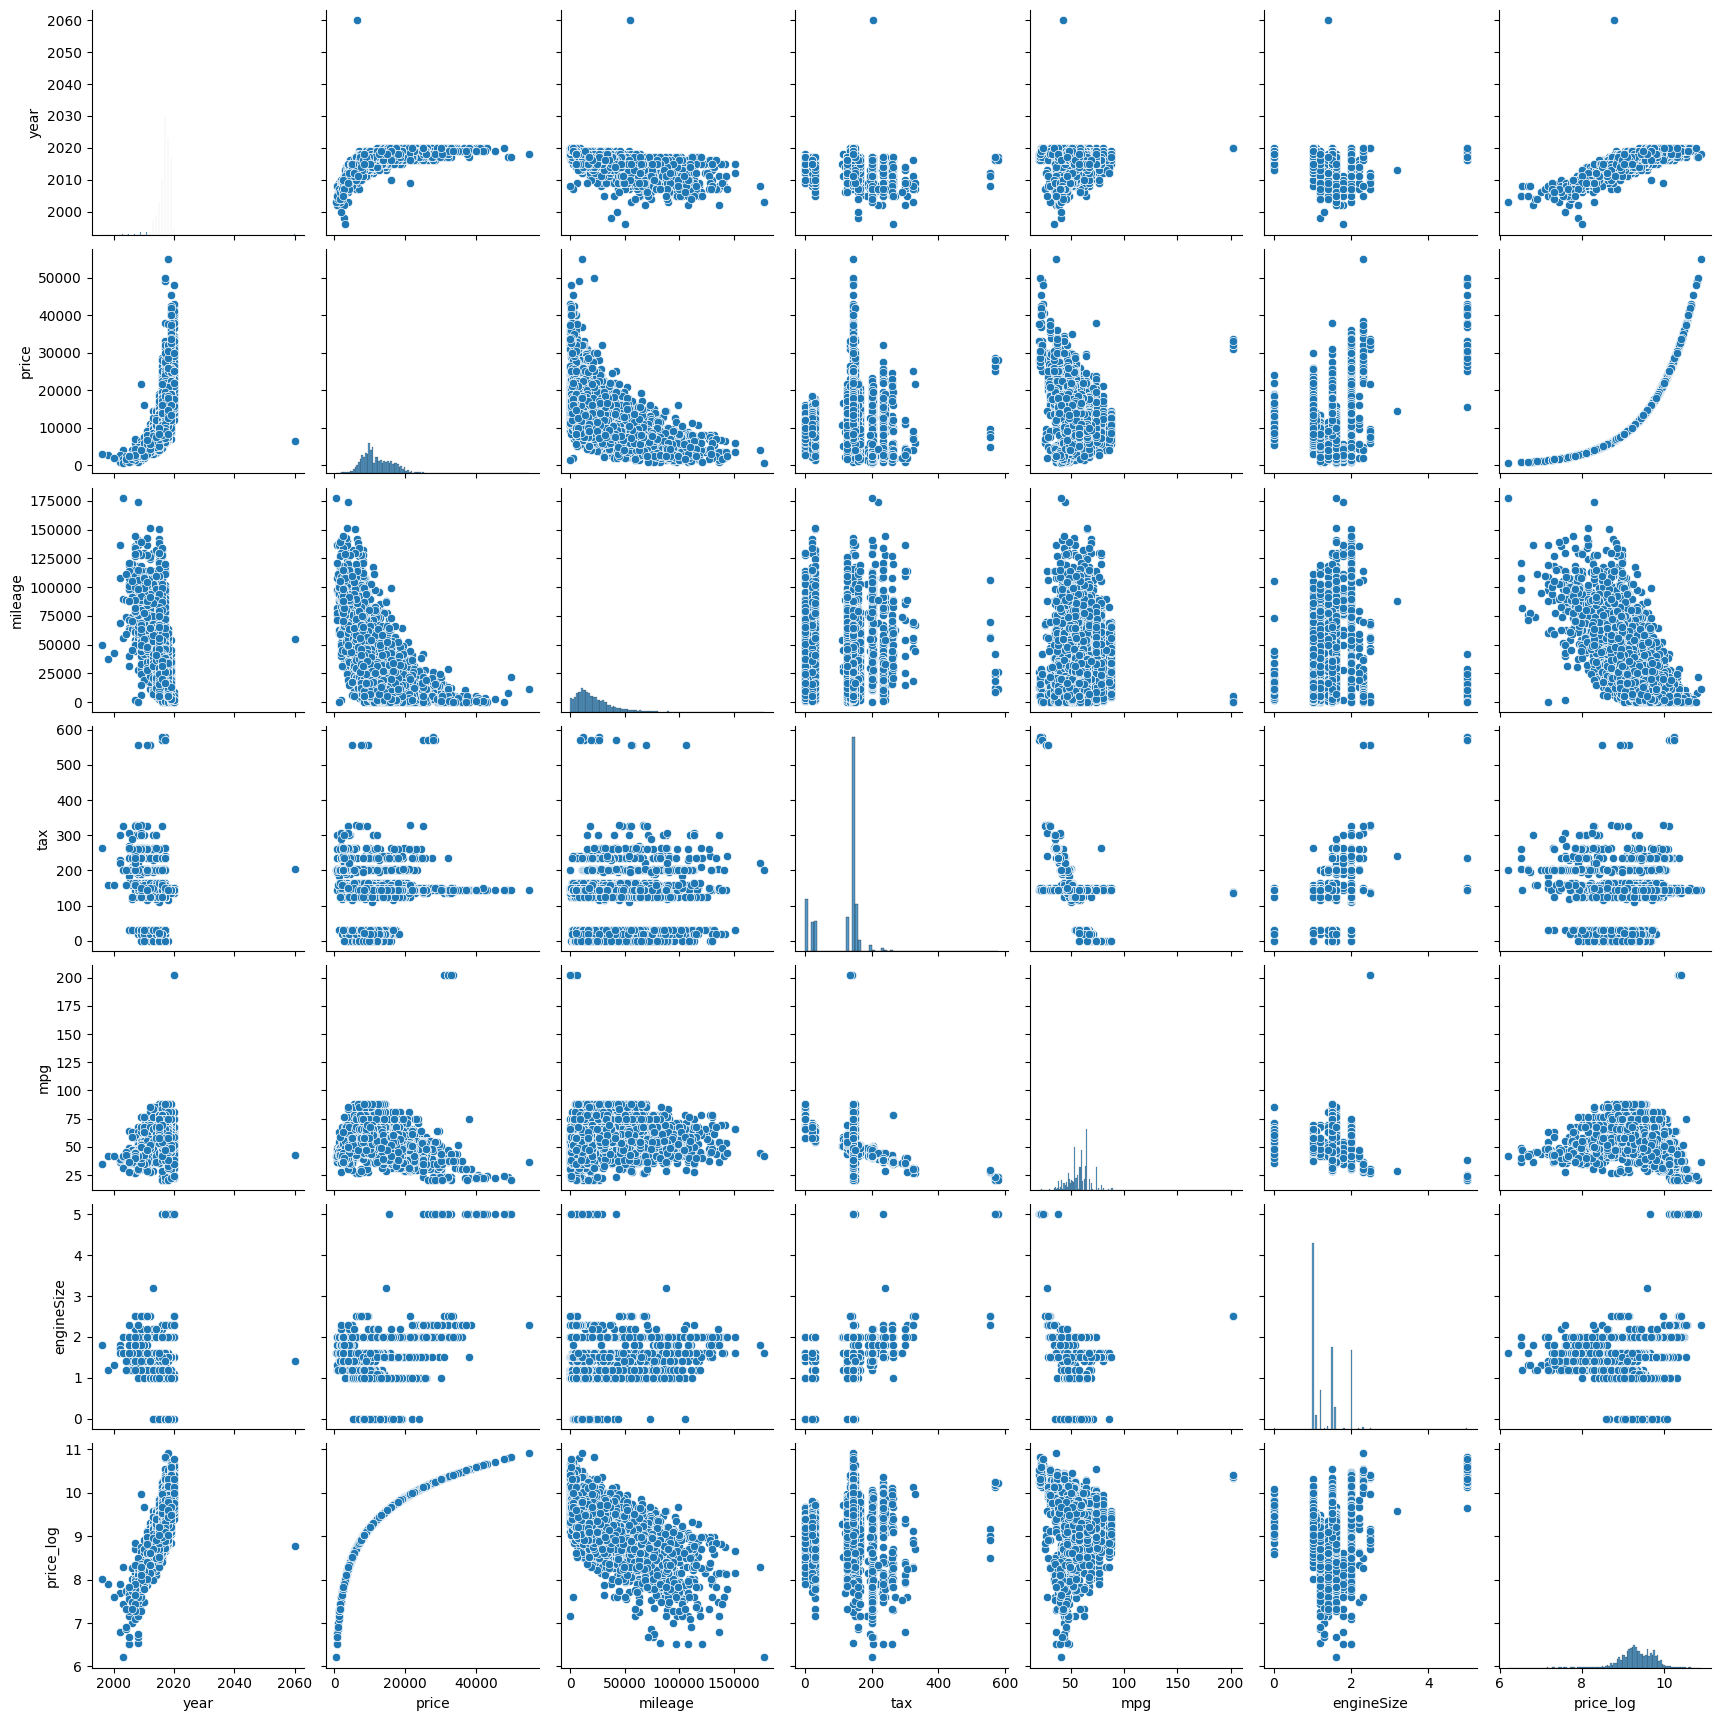

In [102]:
sns.pairplot(df)

In [103]:
num_cols = ['price','mileage','tax','mpg', 'engineSize', 'price_log']
cat_cols = ['model', 'year', 'transmission', 'fuelType']

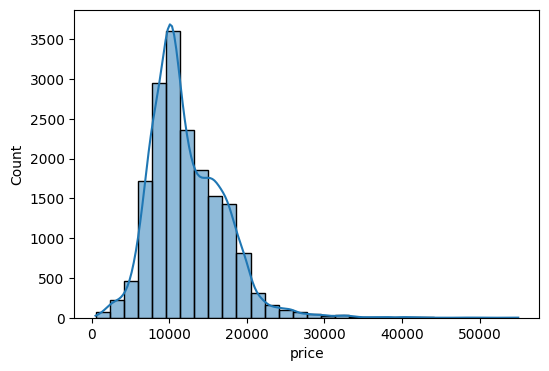

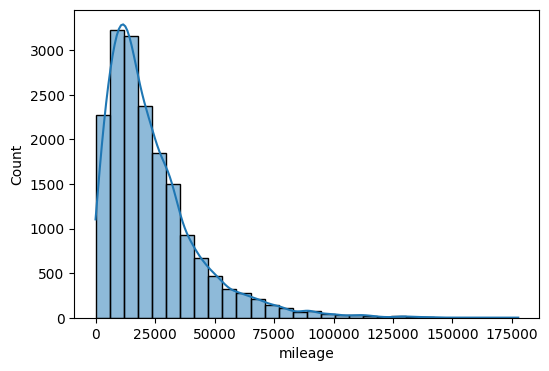

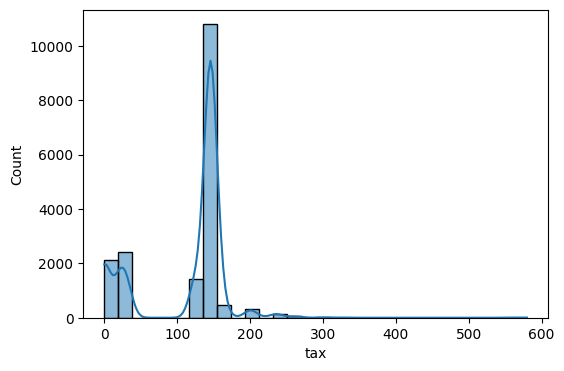

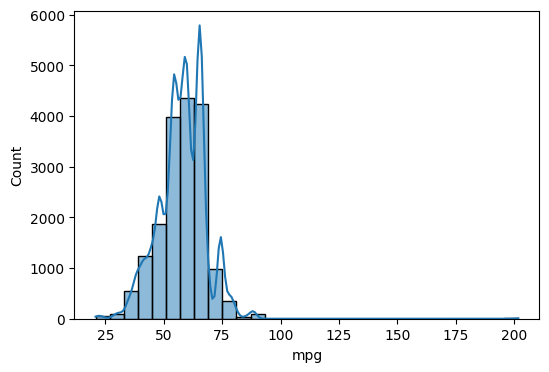

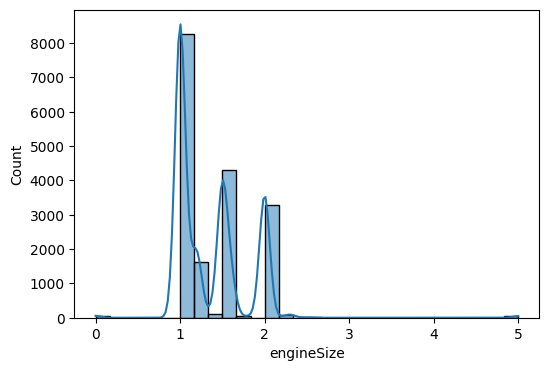

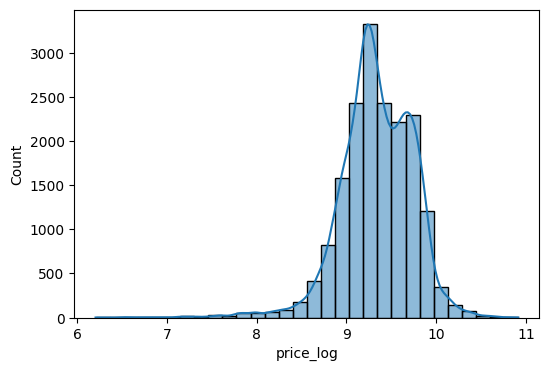

In [104]:
for col in num_cols:
  plt.figure(figsize = (6,4))
  sns.histplot(df[col],kde = True , bins = 30)

mileage and mpg are right skewed so we can use log transformation

In [105]:
df['mileage'] = np.log1p(df['mileage'])

In [106]:
df['mpg'] = np.log1p(df['mpg'])

In [107]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_log
0,Fiesta,2017,12000,Automatic,9.676901,Petrol,150,4.072440,1.0,9.392745
1,Focus,2018,14000,Manual,9.114270,Petrol,150,4.072440,1.0,9.546884
2,Focus,2017,13000,Manual,9.430038,Petrol,150,4.072440,1.0,9.472782
3,Fiesta,2019,17500,Manual,9.255409,Petrol,145,3.720862,1.5,9.770013
4,Fiesta,2019,16500,Automatic,7.301822,Petrol,145,3.906005,1.0,9.711176


<Axes: xlabel='transmission', ylabel='price'>

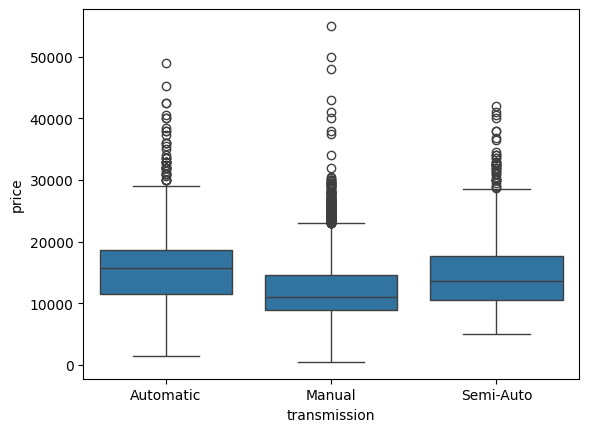

In [108]:
sns.boxplot(data = df , x = 'transmission',y = 'price')

<Axes: xlabel='fuelType', ylabel='price'>

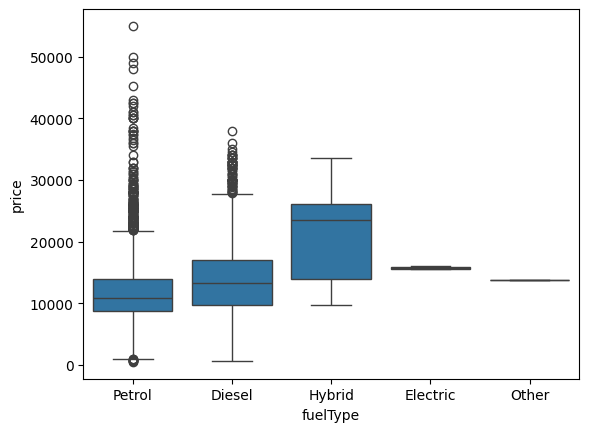

In [109]:
sns.boxplot(data = df , x = 'fuelType',y = 'price')

<Axes: xlabel='year', ylabel='price'>

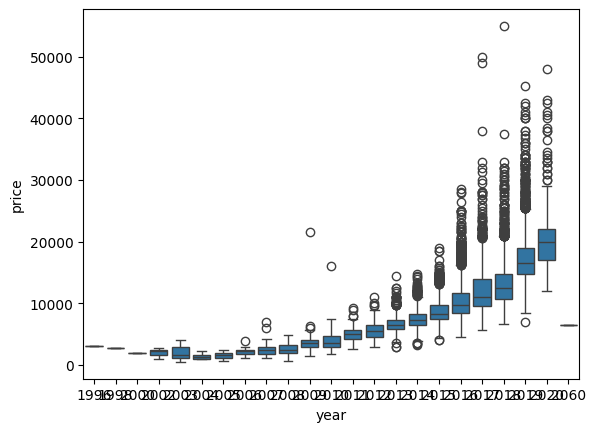

In [110]:
sns.boxplot(data = df , x = 'year',y = 'price')

There is mistaken 2060 value is there we have to remove that

In [111]:
df = df.drop(df[df['year'] == 2060].index)

<Axes: xlabel='model', ylabel='price'>

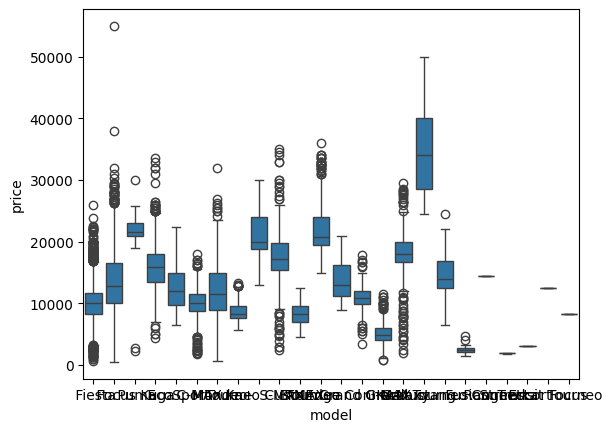

In [112]:
sns.boxplot(data = df , x = 'model',y = 'price')

In [113]:
df['fuelType'].value_counts()

,count
fuelType,
Petrol,12080
Diesel,5706
Hybrid,22
Electric,2
Other,1


In [114]:
df['model'].value_counts()

,count
model,
Fiesta,6508
Focus,4555
Kuga,2208
EcoSport,1127
C-MAX,542
Ka+,523
Mondeo,512
B-MAX,350
S-MAX,294


In [115]:
df['transmission'].value_counts()

,count
transmission,
Manual,15383
Automatic,1353
Semi-Auto,1075


In [116]:
df['year'].value_counts()

,count
year,
2017,4854
2018,3982
2019,3152
2016,2314
2015,1355
2014,799
2013,606
2020,252
2012,115


In [117]:
df = pd.get_dummies(df, columns=['model'], drop_first=True)

In [118]:
df.iloc[:,9:] = df.iloc[:,9:].astype(int)

In [119]:
### converting year to car age
df['year'] = df['year'].astype(int)

df['car_age'] = 2020 - df['year']

df.drop(columns=['year'], inplace=True)

In [120]:
df = pd.get_dummies(df,columns = ['transmission'],drop_first=True)

In [121]:
df.iloc[:,31:] = df.iloc[:,31:].astype(int)

In [122]:
df = pd.get_dummies(df, columns=['fuelType'], drop_first=True)

In [123]:
df.iloc[:,32:] = df.iloc[:,32:].astype(int)

Let's see how the features are correlated

In [124]:
df.head()

,price,mileage,tax,mpg,engineSize,price_log,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,car_age,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,9.676901,150,4.072440,1.0,9.392745,0,0,0,0,...,0,0,0,3,0,0,0,0,0,1
1,14000,9.114270,150,4.072440,1.0,9.546884,0,0,0,0,...,0,0,0,2,1,0,0,0,0,1
2,13000,9.430038,150,4.072440,1.0,9.472782,0,0,0,0,...,0,0,0,3,1,0,0,0,0,1
3,17500,9.255409,145,3.720862,1.5,9.770013,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,16500,7.301822,145,3.906005,1.0,9.711176,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [125]:
df.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'price_log',
       'model_ C-MAX', 'model_ EcoSport', 'model_ Edge', 'model_ Escort',
       'model_ Fiesta', 'model_ Focus', 'model_ Fusion', 'model_ Galaxy',
       'model_ Grand C-MAX', 'model_ Grand Tourneo Connect', 'model_ KA',
       'model_ Ka+', 'model_ Kuga', 'model_ Mondeo', 'model_ Mustang',
       'model_ Puma', 'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'car_age',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [126]:
selected_features = ['price', 'mileage', 'tax', 'mpg', 'engineSize',
       'model_ C-MAX', 'model_ EcoSport', 'model_ Edge', 'model_ Escort',
       'model_ Fiesta', 'model_ Focus', 'model_ Fusion', 'model_ Galaxy',
       'model_ Grand C-MAX', 'model_ Grand Tourneo Connect', 'model_ KA',
       'model_ Ka+', 'model_ Kuga', 'model_ Mondeo', 'model_ Mustang',
       'model_ Puma', 'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'car_age',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

In [127]:
df[selected_features + ['price_log']].corr()['price_log'].sort_values(ascending=False)


,price_log
price_log,1.000000
price,0.942078
tax,0.378534
engineSize,0.288889
model_ Kuga,0.280721
model_ Edge,0.178588
model_ Mustang,0.153499
transmission_Semi-Auto,0.123716
model_ S-MAX,0.122342
model_ Focus,0.113516


In [128]:
cat_cols = ['model_ C-MAX', 'model_ EcoSport', 'model_ Edge', 'model_ Escort',
       'model_ Fiesta', 'model_ Focus', 'model_ Fusion', 'model_ Galaxy',
       'model_ Grand C-MAX', 'model_ Grand Tourneo Connect', 'model_ KA',
       'model_ Ka+', 'model_ Kuga', 'model_ Mondeo', 'model_ Mustang',
       'model_ Puma', 'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'car_age',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

num_cols = ['mileage', 'tax', 'mpg', 'engineSize']

In [129]:
mi_values = mutual_info_regression(df[cat_cols],df['price_log'])

In [130]:
mi_results = pd.DataFrame({
    'Feature': cat_cols,
    'Mutual Information' : mi_values
}).sort_values(by = 'Mutual Information',ascending= False)

In [131]:
mi_results

,Feature,Mutual Information
23,car_age,0.508184
4,model_ Fiesta,0.098367
12,model_ Kuga,0.069965
29,fuelType_Petrol,0.040104
24,transmission_Manual,0.035395
11,model_ Ka+,0.030142
5,model_ Focus,0.028265
2,model_ Edge,0.024672
10,model_ KA,0.024589
14,model_ Mustang,0.018862


## DATA Preprocessing

In [132]:
scalar = StandardScaler()

df[num_cols] = scalar.fit_transform(df[num_cols])

In [133]:
X = df.drop(columns = ['price','price_log'],axis=1)
Y2 = df['price_log']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y2, test_size=0.20, random_state=42
)

model = LinearRegression()

model.fit(X_train, y_train)

# -------------------------------
# CORRECT EVALUATION
# -------------------------------

# 1) Evaluate in LOG scale (R² correct)
train_pred_log = model.predict(X_train)
test_pred_log  = model.predict(X_test)

train_r2_log = r2_score(y_train, train_pred_log)
test_r2_log  = r2_score(y_test, test_pred_log)

# 2) Evaluate in ORIGINAL scale (RMSE correct)
train_pred = np.expm1(train_pred_log)
test_pred  = np.expm1(test_pred_log)

y_train_actual = np.expm1(y_train)
y_test_actual  = np.expm1(y_test)

train_r2 = r2_score(y_train_actual, train_pred)
test_r2  = r2_score(y_test_actual, test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test_actual, test_pred))

print("---- LOG SCALE PERFORMANCE ----")
print("Train R2 (log scale):", train_r2_log)
print("Test  R2 (log scale):", test_r2_log)

print("\n---- ORIGINAL SCALE PERFORMANCE ----")
print("Train R2:", train_r2)
print("Test  R2:", test_r2)
print("Train RMSE:", train_rmse)
print("Test  RMSE:", test_rmse)



---- LOG SCALE PERFORMANCE ----
Train R2 (log scale): 0.8791478390225217
Test  R2 (log scale): 0.8868554189171906

---- ORIGINAL SCALE PERFORMANCE ----
Train R2: 0.8542927065887951
Test  R2: 0.8710643956138232
Train RMSE: 1802.1645607436883
Test  RMSE: 1721.615315274201


Our results are Good

let's try removing some useless featurs

In [135]:
df_copy = df.copy()

In [136]:
cols_to_drop = [
    # Very low MI + very low correlation
    'model_Transit Tourneo',
    'model_Tourneo Connect',
    'model_Grand Tourneo Connect',
    'model_Ranger',
    'model_Streetka',
    'model_Escort',
    'model_Fusion',
    'model_Grand C-MAX',

    # Rare / no signal fuel types
    'fuelType_Electric',
    'fuelType_Other',

    # Duplicate wrong column (remove the one with space)
    'model_ Focus'
]

# Only drop columns that exist (avoids errors)
cols_to_drop = [col for col in cols_to_drop if col in df_copy.columns]

df_copy = df_copy.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)


Dropped columns: ['fuelType_Electric', 'fuelType_Other', 'model_ Focus']


In [140]:
scalar = StandardScaler()

df_copy[num_cols] = scalar.fit_transform(df_copy[num_cols])

In [141]:
X = df_copy.drop(columns = ['price','price_log'],axis=1)
Y2 = df_copy['price_log']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y2, test_size=0.20, random_state=42
)

model = LinearRegression()

model.fit(X_train, y_train)

# -------------------------------
# CORRECT EVALUATION
# -------------------------------

# 1) Evaluate in LOG scale (R² correct)
train_pred_log = model.predict(X_train)
test_pred_log  = model.predict(X_test)

train_r2_log = r2_score(y_train, train_pred_log)
test_r2_log  = r2_score(y_test, test_pred_log)

# 2) Evaluate in ORIGINAL scale (RMSE correct)
train_pred = np.expm1(train_pred_log)
test_pred  = np.expm1(test_pred_log)

y_train_actual = np.expm1(y_train)
y_test_actual  = np.expm1(y_test)

train_r2 = r2_score(y_train_actual, train_pred)
test_r2  = r2_score(y_test_actual, test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test_actual, test_pred))

print("---- LOG SCALE PERFORMANCE ----")
print("Train R2 (log scale):", train_r2_log)
print("Test  R2 (log scale):", test_r2_log)

print("\n---- ORIGINAL SCALE PERFORMANCE ----")
print("Train R2:", train_r2)
print("Test  R2:", test_r2)
print("Train RMSE:", train_rmse)
print("Test  RMSE:", test_rmse)

---- LOG SCALE PERFORMANCE ----
Train R2 (log scale): 0.8743272517988826
Test  R2 (log scale): 0.881946246941241

---- ORIGINAL SCALE PERFORMANCE ----
Train R2: 0.8480690172581029
Test  R2: 0.8655281473030161
Train RMSE: 1840.2506216343759
Test  RMSE: 1758.1882829744784
